# Import datasets and merged it 

In [2007]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


url1 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt"
url2 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt"
url3 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt"
url4 = "https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)




In [2008]:
df1.to_excel('df1.xlsx', index=False, engine='openpyxl')
df2.to_excel('df2.xlsx', index=False, engine='openpyxl')
df3.to_excel('df3.xlsx', index=False, engine='openpyxl')
df4.to_excel('df4.xlsx', index=False, engine='openpyxl')


In [2009]:
df2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [2010]:
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [2011]:
df4.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [2012]:
merge_df = pd.merge(df1, df4, on='client_id', how='inner')


In [2013]:
combined_df = pd.concat([df2, df3], axis = 0)

combined_df = combined_df.reset_index(drop=True)

In [2014]:
combined_df.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [2015]:
merge_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [2016]:
completed_df = pd.merge(merge_df, combined_df, on='client_id', how='left')

# Data Cleaning 

In [2018]:
#checking NaN values

completed_df.isnull().sum()

# fixing Nan values
completed_df['clnt_tenure_yr'].fillna(method='bfill', inplace=True)
completed_df['clnt_tenure_mnth'].fillna(method='bfill', inplace=True)
completed_df['num_accts'].fillna(method='bfill', inplace=True)
completed_df['bal'].fillna(method='bfill', inplace=True)
completed_df['calls_6_mnth'].fillna(method='bfill', inplace=True)
completed_df['logons_6_mnth'].fillna(method='bfill', inplace=True)
completed_df['gendr'].fillna(method='bfill', inplace=True)

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_3544/2310313454.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  completed_df['clnt_tenure_yr'].fillna(method='bfill', inplace=True)
/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_3544/2310313454.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  completed_df['clnt_tenure_yr'].fillna(method='bfill', inplace=True)
/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipyk

In [2019]:
#saving dataset to .xlx file 
completed_df.to_excel('completed_df.xlsx', index=False, engine='openpyxl')


###  Analysis of Age - EDA 

In [2021]:
#making a copy of dt for further analysis
age_category = completed_df.copy()

#categorizing by ages 
age_no_duplicates = age_category.drop_duplicates(subset='client_id', keep='first')

In [2022]:
#function to categorize by age:

def categorize_age(age):
    #if age <= 19:
        #return '<19'
    if 18 < age < 30:
        return '18-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    elif age >= 70:
        return '≥70'


In [2023]:
#Applying the function of categorize_age
age_no_duplicates['age_category'] = age_no_duplicates['clnt_age'].apply(categorize_age)

# Categorize age in percentage 
age_counts = age_no_duplicates['age_category'].value_counts(normalize=True) * 100


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_3544/780604173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_no_duplicates['age_category'] = age_no_duplicates['clnt_age'].apply(categorize_age)


<Figure size 1000x600 with 0 Axes>

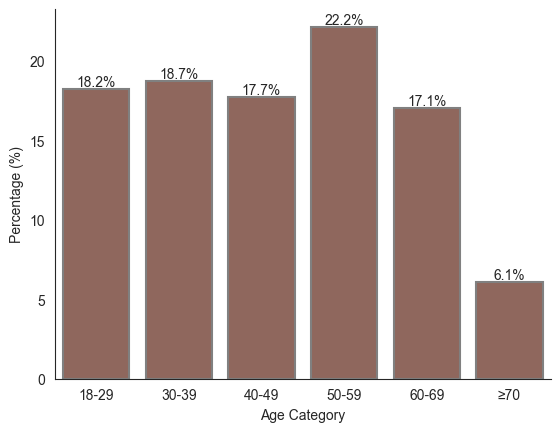

In [2024]:
# Define the order of age categories
age_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '≥70']

# Reindex to ensure the correct order
age_percentage_ordered = age_counts.reindex(age_order).fillna(0)

# Set style and background
sns.set_style("white")  # No gridlines
plt.figure(figsize=(10, 6))
plt.figure(facecolor='None')  # Transparent background

#maroon_color_rgb= (189/255, 66/255, 46/255)  # RGB values for maroon


# Create the bar plot with light maroon color
sns.barplot(x=age_percentage_ordered.index, y=age_percentage_ordered.values, color="#976255", edgecolor='gray', linewidth=1.5)

# Add titles and labels
#plt.title('Percentage of Clients by Age')
plt.xlabel('Age Category')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for index, value in enumerate(age_percentage_ordered.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Remove frame around the graph
sns.despine()

# Define the save path
save_path = "../images"

# Save the plot with transparent background
plt.savefig(os.path.join(save_path, 'age_distribution.png'), dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()

### Analysis of Gender - EDA 

In [2026]:
#determine the number of clients per gender
age_no_duplicates["gendr"].value_counts()

#calculate the percentage of clients per gender
gender = age_no_duplicates["gendr"].value_counts(normalize=True) * 100


<Figure size 800x600 with 0 Axes>

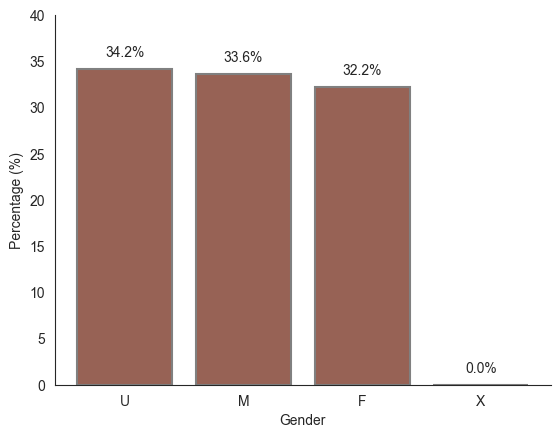

In [2027]:
# Calculate the percentage for each gender
gender_percentage = age_no_duplicates["gendr"].value_counts(normalize=True) * 100

# Set style and background
sns.set_style("white")  # No gridlines
plt.figure(figsize=(8, 6))
plt.figure(facecolor='None')  # Transparent background

# Define the maroon color with alpha 0.7
#maroon_color_rgba = (128/255, 0, 0, 0.7)  # RGBA values for #800000 with alpha 0.7

# Create the bar plot with maroon color and transparency
bars = plt.bar(gender_percentage.index, gender_percentage.values, 
               color="#976255", edgecolor='gray', linewidth=1.5)

# Set the x-axis and y-axis labels
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0, 40)  # Setting the y-axis limit for better visualization

# Add percentage labels on top of each bar
for bar, value in zip(bars, gender_percentage.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{value:.1f}%", ha='center', va='bottom')

# Remove spines
sns.despine()

# Save the plot with transparent background
save_path = "../images"

plt.savefig(os.path.join(save_path, 'gender_distribution.png'), dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


### Analysis of Client Tenure - EDA 

In [2029]:
#checking unique values of client tenure 
age_no_duplicates["clnt_tenure_yr"].unique()

array([ 6.,  7.,  5., 16., 12., 30., 15.,  8.,  4.,  3., 10., 11., 13.,
       14., 19., 18., 25., 23., 21., 17.,  9., 27., 24., 20., 28., 22.,
       29., 46., 26., 32., 33., 35.,  2., 38., 31., 48., 34., 36., 51.,
       47., 49., 37., 39., 40., 55., 42., 44., 43., 50., 54., 41., 45.,
       52., 62.])

In [2030]:
#creating a function to categorize the client tenure
def categorize_yr(year):
    if year <= 5:
        return '0-5'
    elif 5 <= year < 10:
        return '5-10'
    elif 10 <= year < 15:
        return '10-15'
    elif 15 <= year < 20:
        return '15-20'
    elif 20 <= year < 25:
        return '20-25'
    elif year >= 25:
        return '≥ 25'

In [2031]:
# Applying the function above
age_no_duplicates['year_category'] = age_no_duplicates['clnt_tenure_yr'].apply(categorize_yr)


/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_3544/2972811201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_no_duplicates['year_category'] = age_no_duplicates['clnt_tenure_yr'].apply(categorize_yr)


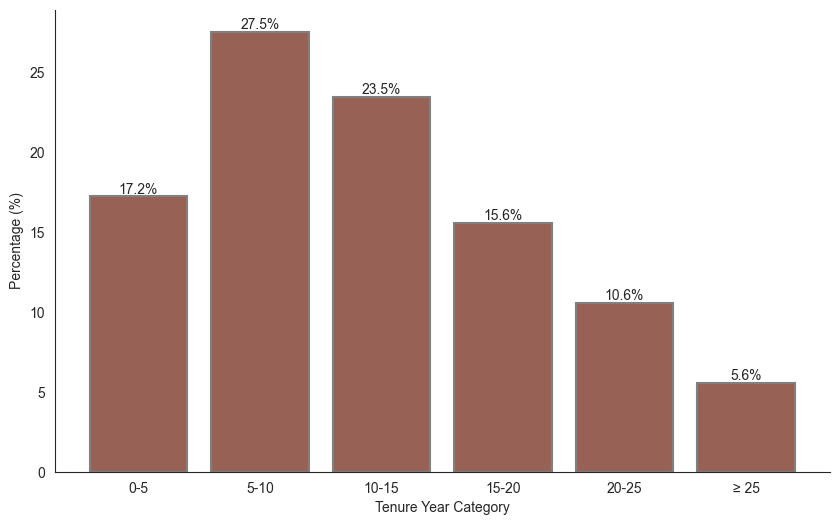

In [2032]:
# Plot the client Ternure per percentage 

# Calculate the percentage for each year category
year_percentage = age_no_duplicates['year_category'].value_counts(normalize=True) * 100

# Define the order of year categories
year_order = ['0-5', '5-10', '10-15', '15-20', '20-25', '≥ 25']

# Reindex to ensure the correct order
year_percentage_ordered = year_percentage.reindex(year_order).fillna(0)

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create the bar plot
bars = plt.bar(year_percentage_ordered.index, year_percentage_ordered.values, color='#976255')

# Add titles and labels
#plt.title('Percentage of Clients by Tenure Year Category')
plt.xlabel('Tenure Year Category')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for index, value in enumerate(year_percentage_ordered.values):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

# Add color to the border of bars
for bar in bars:
    bar.set_edgecolor('gray')  # Set border color to gray
    bar.set_linewidth(1.5)  # Set border width

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set transparent background
plt.gcf().patch.set_facecolor('None')
plt.gca().patch.set_alpha(0)

# Define the save path
save_path = "../images"

# Save the plot with transparent background
plt.savefig(os.path.join(save_path, 'Clients by Tenure Year Category.png'), dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()



In [2033]:
#age_no_duplicates.to_csv

age_no_duplicates.to_excel('clean_no_duplicates.xlsx', index=False, engine='openpyxl')


## Experiment A/B test

In [2035]:
#spliting the data in test and control 
test_data_1 = completed_df[completed_df['Variation'] == 'Test']
control_data_1 = completed_df[completed_df['Variation'] == 'Control']

In [2036]:
control_data_1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
11,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
12,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53
13,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04
14,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31
15,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321283,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55
321284,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14
321285,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29
321286,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07


In [2037]:
#function to calculate the time between steps:

def subtract_date_column(df1, df2):
     # Merge DataFrames on 'client_id' with custom suffixes
    merged_df = pd.merge(df1, df2, on='client_id', suffixes=('_step_x', '_step_y'))
    
    # Subtract 'date_time' column of df2 from 'date_time' column of df1
    result_df = pd.DataFrame()
    result_df['time_step_z'] = merged_df['date_time_step_x'] - merged_df['date_time_step_y']
    
    return result_df

## Test analysis 

In [2039]:
test_data_1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [2040]:
#creating a df for test_data_1  to try differents approaches

tested = test_data_1.copy()


In [2041]:
# create a new column for process_step with numbers instead of words
name_to_value = {
    "start": "1",
    "step_1": "2",
    "step_2": "3",
    "step_3": "4",
    "confirm": "5"

}
tested['process_step_n'] = tested['process_step'].map(name_to_value)

# transforming date_time in datetime64[ns] types
tested['date_time'] = pd.to_datetime(tested['date_time'])

# sorting the data set by order descending of this columns 
tested.sort_values(by=["client_id", "date_time", "process_step_n"], ascending=[False, False, False], inplace=True)



In [2042]:
#Grouping by client_id
tested_excel = tested.groupby('client_id').first().reset_index()

In [2043]:
tested_excel.to_excel('test.xlsx', index=False, engine='openpyxl')


In [2044]:
#Checking the amount of users in each step
tested_excel["process_step"].value_counts()

process_step
confirm    18165
start       5577
step_1      1652
step_3      1002
step_2       572
Name: count, dtype: int64

### Step 1 - Test

In [2046]:
#filter by process step "start" 

filtered_data_start = tested[tested['process_step_n'] == "1"]

#creating new df for all the values of "start"

start_test_data = filtered_data_start.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
start_test_data = start_test_data.reset_index()


In [2047]:
#filter by process step "step1" 

filtered_data_step1 = tested[tested['process_step_n'] == "2"]

#creating new df for all the values of "step1"

step1_test_data = filtered_data_step1.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step1_test_data = step1_test_data.reset_index()


In [2048]:
#applying the function to calculate the time between steps
step_1_time_1 = subtract_date_column(step1_test_data, start_test_data)

In [2049]:
#Convert "days" to type date
step_1_time_1 ['days'] = step_1_time_1 ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_1_time_1 ['seconds'] = step_1_time_1 ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_1_time_1 ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_1_time_1 ['time_step_z'].dt.components['seconds']

In [2050]:
#filtering for those took less than one day and half an hour
filter_step_1 = step_1_time_1[(step_1_time_1['days'] == 0)]
filter_step_1 = filter_step_1[(filter_step_1['seconds'] < 1800)]

len(filter_step_1)
#mean of time takes from going to start to step1
step_1_mean = filter_step_1["seconds"].mean()

#mean of time takes from going to start to step1
step_1_std = filter_step_1["seconds"].std()

In [2051]:
step_1_time_1["days"].count()

24201

In [2052]:
#filtering por those we went back one step, representing an error
filter_step_1_error = step_1_time_1[(step_1_time_1['days'] < 0)]


In [2053]:
#Calculated the error of going on step back in percentage
error_step_1_test = round((filter_step_1_error["days"].count() / step_1_time_1["days"].count())*100,1)

In [2054]:
#Calculated the error of going on step back
porpotion_error_step_1_test = filter_step_1_error["days"].count() / step_1_time_1["days"].count()

### Step 2 - Test

In [2056]:
#filter by process step "step2" 

filtered_data_step2 = tested[tested['process_step_n'] == "3"]

#creating new df for all the values of "step2"

step2_test_data = filtered_data_step2.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step2_test_data = step2_test_data.reset_index()

In [2057]:
#applying the function to calculate the time between steps

step_2_time = subtract_date_column(step2_test_data, step1_test_data)

In [2058]:
#Convert "days" to type date
step_2_time ['days'] = step_2_time ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_2_time ['seconds'] = step_2_time ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_2_time ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_2_time ['time_step_z'].dt.components['seconds']

In [2059]:
#filtering for those took less than one day and half an hour
filter_step_2 = step_2_time[(step_2_time['days'] == 0)]
filter_step_2 = filter_step_2[(filter_step_2['seconds'] < 1800)]

#mean of time takes from going to step1 to step2
step_2_mean = filter_step_2["seconds"].mean()

#mean of time takes from going to step1 to step2
step_2_std =filter_step_2["seconds"].std()

In [2060]:
#filtering por those we went back one step, representing an error
filter_step_2_error = step_2_time[(step_2_time['days'] < 0)]


In [2061]:
#Calculated the error of going on step back in percentage
error_step_2_test = round((filter_step_2_error["days"].count() / step_2_time["days"].count())*100,2)

In [2062]:
#Calculated the error of going on step back
porpotion_error_step_2_test = filter_step_2_error["days"].count() / step_2_time["days"].count()


### Step 3 - Test

In [2064]:
#filter by process step "step3" 

filtered_data_step3 = tested[tested['process_step_n'] == "4"]

#creating new df for all the values of "step3"

step3_test_data = filtered_data_step3.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step3_test_data = step3_test_data.reset_index()

In [2065]:
#applying the function to calculate the time between steps

step_3_time = subtract_date_column(step3_test_data, step2_test_data)

In [2066]:
#Convert "days" to type date
step_3_time ['days'] = step_3_time ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_3_time ['seconds'] = step_3_time ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_3_time ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_3_time ['time_step_z'].dt.components['seconds']

In [2067]:
#filtering for those took less than one day and half an hour
filter_step_3 = step_3_time[(step_3_time['days'] == 0)]
filter_step_3 = filter_step_3[(filter_step_3['seconds'] < 1800)]

#mean of time takes from going to step2 to step3
step_3_mean = filter_step_3["seconds"].mean()

#mean of time takes from going to step2 to step3
step_3_std = filter_step_3["seconds"].std()

In [2068]:
#filtering por those we went back one step, representing an error

filter_step_3_error = filter_step_3[(filter_step_3['days'] < 0)]


In [2069]:
#Calculated the error of going on step back in percentage

error_step_3_test = round((filter_step_3_error["days"].count() / step_3_time["days"].count())*100,2)

In [2070]:
#Caculated the error of going on step back
porpotion_error_step_3_test=filter_step_3_error["days"].count() / step_3_time["days"].count()

### Confirm - Test

In [2072]:
#filter by process step "confirm" 

filtered_data_confirm = tested[tested['process_step_n'] == "5"]

#creating new df for all the values of "confirm"

confirm_test_data = filtered_data_confirm.groupby('client_id').first()[["visit_id", 'date_time', 'gendr']]

# Reset index to make 'client_id' a column again
confirm_test_data = confirm_test_data.reset_index()


In [2073]:
confirm_test_data["gendr"].value_counts()

gendr
U    6505
M    6354
F    5828
Name: count, dtype: int64

In [2074]:
#applying the function to calculate the time between steps

step_confirm_time = subtract_date_column(confirm_test_data, step3_test_data)

In [2075]:
#Convert "days" to type date
step_confirm_time ['days'] = step_confirm_time ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_confirm_time ['seconds'] = step_confirm_time ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_confirm_time ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_confirm_time ['time_step_z'].dt.components['seconds']

In [2076]:
#filtering for those took less than one day and half an hour 
filter_confirm = step_confirm_time[(step_confirm_time['days'] == 0)]

filter_confirm = step_confirm_time[(step_confirm_time['seconds'] < 1800)]

#mean of time takes from going to step2 to step3
step_confirm_mean = filter_confirm["seconds"].mean()

#mean of time takes from going to step2 to step3
step_confirm_std = filter_confirm["seconds"].std()

In [2077]:
#filtering por those we went back one step, representing an error

filter_confirm_error = step_confirm_time[(step_confirm_time['days'] < 0)]


In [2078]:
#Calculated the error of going on step back in percentage

error_confirm_test = round((filter_confirm_error["days"].count() / step_confirm_time["days"].count())*100,2)

In [2079]:
#Calculated the error of going on step back 
porpotion_error_confirm_test = filter_confirm_error["days"].count() / step_confirm_time["days"].count()


In [2080]:
#Mean of those who reach the step "confirm"
step_confirm_mean

128.823415225963

### Data Visualization - Time spend on each step on "test"

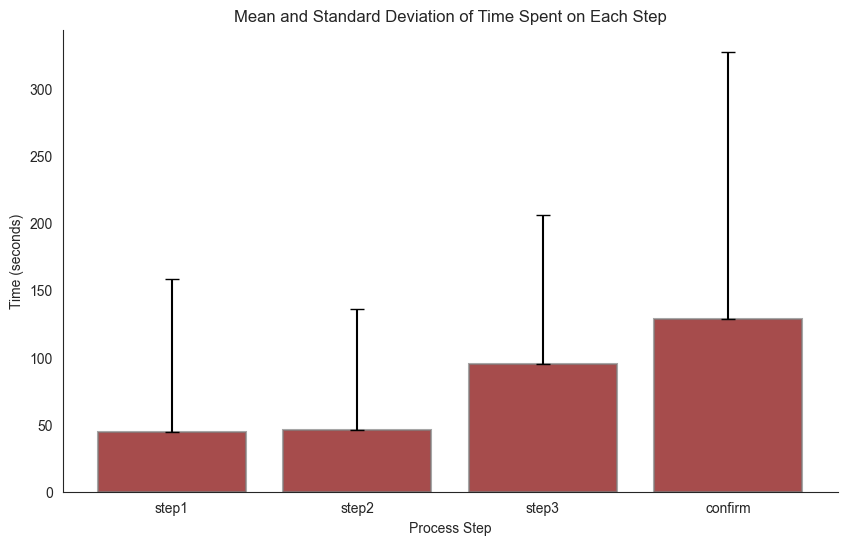

In [2082]:


#Plot of the Mean and Standard Deviation of Time Spent on Each Step

# List of means and standard deviations
step_means = [step_1_mean, step_2_mean, step_3_mean, step_confirm_mean]
step_stds = [step_1_std, step_2_std, step_3_std, step_confirm_std]
steps = ['step1', 'step2', 'step3', 'confirm']

# Create the bar plot
x_pos = np.arange(len(steps))
plt.figure(figsize=(10, 6), facecolor='None')  # Transparent background

# Define asymmetric error bars: no error below, std above
error_bars = [0, 0, 0, 0], step_stds

# Define light maroon color using RGBA values
#light_maroon_rgba = (128/255, 0, 0, 1)  # Adding alpha channel (1 for fully opaque)
maroon_hex = "#800000"

# Create the bar plot with maroon color and borders
plt.bar(x_pos, step_means, yerr=error_bars, capsize=5, alpha=0.7, color=maroon_hex, edgecolor='gray', linewidth=1.5)


# Remove gridlines
plt.grid(False)
sns.despine()

# Add labels and title
plt.xlabel('Process Step')
plt.ylabel('Time (seconds)')
plt.title('Mean and Standard Deviation of Time Spent on Each Step')
plt.xticks(x_pos, steps)
# Save the plot with transparent background
plt.savefig(os.path.join(save_path, 'Mean and Standard Deviation(TEST).png'), dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


## Control Analysis

In [2084]:
#creating a copy of df to try differents approaches

control_test = control_data_1.copy()

control_test_1 = control_data_1.copy()



In [2085]:
# create a new column for process_step with numbers instead of words
name_to_value = {
    "start": "1",
    "step_1": "2",
    "step_2": "3",
    "step_3": "4",
    "confirm": "5"

}

control_test_1['process_step_n'] = control_test_1['process_step'].map(name_to_value)



In [2086]:
# transforming date_time in datetime64[ns] types
control_test_1['date_time'] = pd.to_datetime(control_test_1['date_time'])

# sorting the data set by order descending of this columns 
control_test_1.sort_values(by=["client_id", "date_time", "process_step_n"], ascending=[False, False, False], inplace=True)

In [2087]:
control_test_1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,process_step_n
27204,9998921,15.0,189.0,38.0,F,2.0,30644.10,4.0,7.0,Control,960034051_85687824805,378424178_59565976155_8051,start,2017-04-18 11:26:31,1
143002,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,5
143001,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,4
143003,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,4
143004,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:30:25,4


In [2088]:
control_excel = control_test_1.groupby('client_id').first().reset_index()


In [2280]:
#save the df in .xlx file
control_excel.to_excel('control.xlsx', index=False, engine='openpyxl')


### Step 1 - Control

In [2091]:
#filter by process step "start" in control test

filtered_data_start_control = control_test_1[control_test_1['process_step_n'] == "1"]

#creating new df for all the values of "start"

start_control_data = filtered_data_start_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
start_control_data = start_control_data.reset_index()

In [2092]:
start_control_data.head()

,client_id,visit_id,date_time
0,1028,557292053_87239438319_391157,2017-04-08 18:51:28
1,1104,643221571_99977972121_69283,2017-06-20 22:31:33
2,1186,795373564_99931517312_810896,2017-04-08 18:05:02
3,1195,393817425_39015278493_996341,2017-04-05 20:15:26
4,1197,71862471_21202285428_848395,2017-04-01 17:16:24


In [2093]:
#filter by process step "step1" in control

filtered_data_step1_control = control_test_1[control_test_1['process_step_n'] == "2"]

#creating new df for all the values of "step1"

#step1_test_data_control = filtered_data_step1_control.groupby('client_id').first()[['date_time']]

step1_test_data_control = filtered_data_step1_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step1_test_data_control = step1_test_data_control.reset_index()


In [2094]:
step1_test_data_control.head()

,client_id,visit_id,date_time
0,1028,557292053_87239438319_391157,2017-04-08 19:00:26
1,1186,795373564_99931517312_810896,2017-04-08 18:05:13
2,1195,393817425_39015278493_996341,2017-04-05 20:15:59
3,1197,71862471_21202285428_848395,2017-04-01 17:16:28
4,3647,53540785_76819002881_890663,2017-06-01 15:48:13


In [2095]:
#applying the function to calculate the time between steps
step_1_time_control = subtract_date_column(step1_test_data_control, start_control_data)

In [2096]:
#Convert "days" to type date
step_1_time_control ['days'] = step_1_time_control ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_1_time_control ['seconds'] = step_1_time_control ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_1_time_control ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_1_time_control ['time_step_z'].dt.components['seconds']


In [2097]:
#filtering for those took less than one day and half an hour
filter_step_1_control = step_1_time_control[(step_1_time_control['days'] == 0)]
filter_step_1_control = step_1_time_control[(step_1_time_control['seconds'] < 1800)]

#mean of time takes from going to start to step1
step_1_mean_control = filter_step_1_control["seconds"].mean()

#mean of time takes from going to start to step1
step_1_std_control = filter_step_1_control["seconds"].std()

In [2098]:
#filtering por those we went back one step, representing an error
filter_step_1_control_error = step_1_time_control[(step_1_time_control['days'] < 0)]


In [2099]:
#Calculated the error of going on step back in percentage
error_step_1_control = round((filter_step_1_control_error["days"].count() / step_1_time_control["days"].count())* 100,2)

In [2100]:
#Calculated the error of going on step back
porpotion_error_step_1_control=filter_step_1_control_error["days"].count() / step_1_time_control["days"].count()

### Step 2 - Control 

In [2102]:
#filter by process step "step2" 

filtered_data_step2_control = control_test_1[control_test_1['process_step_n'] == "3"]

#creating new df for all the values of "step2"

step2_test_data_control = filtered_data_step2_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step2_test_data_control = step2_test_data_control.reset_index()


In [2103]:
#applying the function to calculate the time between steps
step_2_time_control = subtract_date_column(step2_test_data_control, step1_test_data_control)


In [2104]:
#Convert "days" to type date
step_2_time_control ['days'] = step_2_time_control ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_2_time_control ['seconds'] = step_2_time_control ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_2_time_control ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_2_time_control ['time_step_z'].dt.components['seconds']


In [2105]:
#filtering for those took less than one day and half and hour 
filter_step_2_control = step_2_time_control[(step_2_time_control['days'] == 0)]
filter_step_2_control = step_2_time_control[(step_2_time_control['seconds'] < 1800)]

#mean of time takes from going to step1 to step2
step_2_mean_control = filter_step_2_control["seconds"].mean()

#mean of time takes from going to step1 to step2
step_2_std_control =filter_step_2_control["seconds"].std()

In [2106]:
#filtering por those we went back one step, representing an error
filter_step_2_control_error = step_2_time_control[(step_2_time_control['days'] < 0)]

#Calculated the error of going on step back in percentage
error_step_2_control = round((filter_step_2_control_error["days"].count() / step_2_time_control["days"].count())*100,2)

In [2107]:
#Calculated the error of going on step back
porpotion_error_step_2_control=filter_step_2_control_error["days"].count() / step_2_time_control["days"].count()

In [2108]:
#mean of those who reach step 2 
step_2_mean_control

53.16642068599091

In [2109]:
#Standard deviation of those who reach step 2 

step_2_std_control

104.30302838289646

### Step 3 - Control

In [2111]:
#filter by process step "step3" in control

filtered_data_step3_control = control_test_1[control_test_1['process_step_n'] == "4"]

#creating new df for all the values of "step3"

step3_test_data_control = filtered_data_step3_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
step3_test_data_control = step3_test_data_control.reset_index()

In [2112]:
#applying the function to calculate the time between steps
step_3_time_control = subtract_date_column(step3_test_data_control, step2_test_data_control)

In [2113]:
#Convert "days" to type date
step_3_time_control ['days'] = step_3_time_control ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_3_time_control ['seconds'] = step_3_time_control ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_3_time_control ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_3_time_control ['time_step_z'].dt.components['seconds']


#filtering for those took less than one day
filter_step_3_control = step_3_time_control[(step_3_time_control['days'] == 0)]
filter_step_3_control = step_3_time_control[(step_3_time_control['seconds'] < 1800)]

#mean of time takes from going to step2 to step3
step_3_mean_control = filter_step_3_control["seconds"].mean()

#mean of time takes from going to step2 to step3
step_3_std_control = filter_step_3_control["seconds"].std()

In [2114]:
#filtering por those we went back one step, representing an error
filter_step_3_control_error = step_3_time_control[(step_3_time_control['days'] < 0)]

#Calculated the error of going on step back in percentage
error_step_3_control = round((filter_step_3_control_error["days"].count() / step_3_time_control["days"].count()) *100,2)

In [2115]:
#Calculated the error of going on step back
porpotion_error_step_3_control=filter_step_3_control_error["days"].count() / step_3_time_control["days"].count()

In [2116]:
#mean of those who reach step 2 
step_3_mean_control

97.58430198426676

In [2117]:
#Standard deviation of those who reach step 3 
step_3_std_control

116.38479498571104

### Confirm - Control

In [2119]:
#filter by process step "confirm" in control

filtered_data_confirm_control = control_test_1[control_test_1['process_step_n'] == "5"]

#creating new df for all the values of "confirm"

confirm_test_data_control = filtered_data_confirm_control.groupby('client_id').first()[["visit_id", 'date_time']]

# Reset index to make 'client_id' a column again
confirm_test_data_control = confirm_test_data_control.reset_index()


In [2120]:
#applying the function to calculate the time between steps
step_confirm_time_control = subtract_date_column(confirm_test_data_control, step3_test_data_control)


In [2121]:
#Convert "days" to type date
step_confirm_time_control  ['days'] = step_confirm_time_control  ['time_step_z'].dt.days
# Convert hours and minutes to seconds and add them to the total seconds
step_confirm_time_control  ['seconds'] = step_confirm_time_control  ['time_step_z'].dt.components['hours'] * 3600 + \
                        step_confirm_time_control  ['time_step_z'].dt.components['minutes'] * 60 + \
                        step_confirm_time_control  ['time_step_z'].dt.components['seconds']


In [2122]:
#filtering for those took less than one day and half an hour
filter_confirm_control = step_confirm_time_control[(step_confirm_time_control['days'] == 0)]

filter_confirm_control = step_confirm_time_control[(step_confirm_time_control['seconds'] < 1800)]

#mean of time takes from going to step2 to step3
step_confirm_mean_control = filter_confirm_control["seconds"].mean()

#mean of time takes from going to step2 to step3
step_confirm_std_control = filter_confirm_control["seconds"].std()

In [2123]:
#filtering por those we went back one step, representing an error
filter_confirm_control_error = step_confirm_time_control[(step_confirm_time_control['days'] < 0)]

#Calculated the error of going on step back in percentage

error_confirm_control = round((filter_confirm_control_error["days"].count() / step_confirm_time_control["days"].count())*100,2)

In [2124]:
#Calculated the error of going on step back

propotion_error_confirm_control = filter_confirm_control_error["days"].count() / step_confirm_time_control["days"].count()

In [2125]:
#mean of those who reach step confirm 

step_confirm_mean_control 

133.25762780359668

### Data Visualization: Time spend on each step on "control"

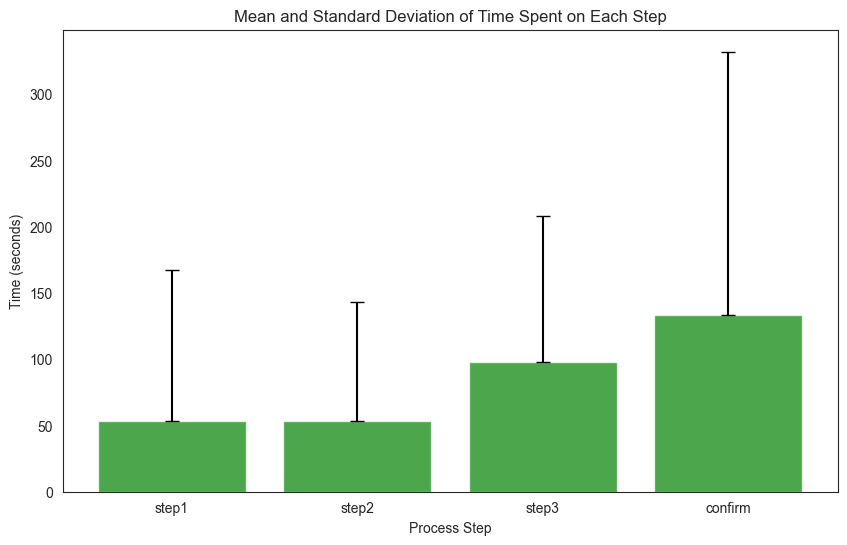

In [2127]:
# List of means and standard deviations
step_means_control = [step_1_mean_control, step_2_mean_control, step_3_mean_control, step_confirm_mean_control]
step_stds_control = [step_1_std_control, step_2_std_control, step_3_std_control, step_confirm_std_control]
steps = ['step1', 'step2', 'step3', 'confirm']

# Create the bar plot
x_pos = np.arange(len(steps))
plt.figure(figsize=(10, 6))

# Define asymmetric error bars: no error below, std above
error_bars = [0, 0, 0, 0], step_stds

plt.bar(x_pos, step_means_control, yerr=error_bars, capsize=5, alpha=0.7, color='green')

# Add labels and title
plt.xlabel('Process Step')
plt.ylabel('Time (seconds)')
plt.title('Mean and Standard Deviation of Time Spent on Each Step')
plt.xticks(x_pos, steps)
plt.show()

## Data Visualization: Time spend on each step 

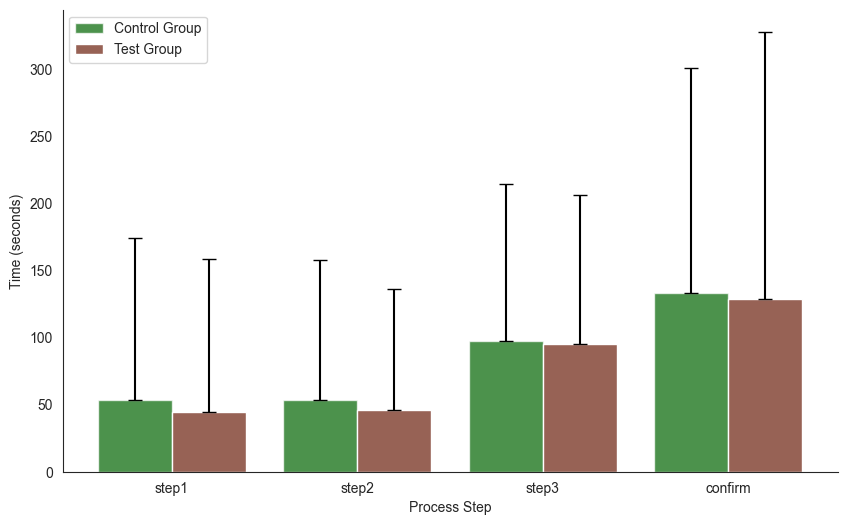

In [2129]:
import numpy as np
import matplotlib.pyplot as plt

# Control group data
step_means_control = [step_1_mean_control, step_2_mean_control, step_3_mean_control, step_confirm_mean_control]
step_stds_control = [step_1_std_control, step_2_std_control, step_3_std_control, step_confirm_std_control]

# Test group data
step_means = [step_1_mean, step_2_mean, step_3_mean, step_confirm_mean]
step_stds = [step_1_std, step_2_std, step_3_std, step_confirm_std]

steps = ['step1', 'step2', 'step3', 'confirm']
x_pos = np.arange(len(steps))

# Create the bar plot
plt.figure(figsize=(10, 6))

# Define asymmetric error bars: no error below, std above
error_bars_control = [0, 0, 0, 0], step_stds_control
error_bars_test = [0, 0, 0, 0], step_stds

# Plot for control group
plt.bar(x_pos - 0.2, step_means_control, yerr=error_bars_control, capsize=5, alpha=0.7, color='darkgreen', width=0.4, label='Control Group')

# Plot for test group
plt.bar(x_pos + 0.2, step_means, yerr=error_bars_test, capsize=5, color='#976255', width=0.4, label='Test Group')

# Add labels and title
plt.xlabel('Process Step')
plt.ylabel('Time (seconds)')
#plt.title('Mean and Standard Deviation of Time Spent on Each Step')
plt.xticks(x_pos, steps)
plt.legend()

# Remove gridlines and spines
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Make background transparent
plt.gcf().patch.set_facecolor('None')

plt.savefig(os.path.join(save_path, 'Mean and Standard Deviation(controlvstest).png'), dpi=300, bbox_inches='tight', transparent=True)


# Show the plot
plt.show()


## Data Visualization: Completion rate 


In [2131]:
#calculating the propotion of confirms for "test"

x_test = tested.copy()
y_test = tested.copy()

x_test = x_test[x_test["process_step_n"] == "5"]
percentage_test = x_test.drop_duplicates(subset=['client_id'], keep='first')

y_test = y_test.drop_duplicates(subset=['client_id'], keep='first')

sum_drop_test = percentage_test.value_counts().sum()
sum_confirms_test = y_test.value_counts().sum()

proportion_confirm_test = round((sum_drop_test / sum_confirms_test)*100, 2)

In [2132]:
proportion_confirm_test_1 = round((sum_drop_test / sum_confirms_test), 2)

In [2133]:
# creating a copy of the df for testing further analysis
drop_control = control_test_1.copy()

In [2134]:
#calculating the propotion of confirms for "control"

x = drop_control[drop_control["process_step_n"] == "5"]
x_drop = x.drop_duplicates(subset=['client_id'], keep='first')

y = drop_control.drop_duplicates(subset=["client_id"], keep ="first")

sum_x = x_drop.value_counts().sum()
sum_y = y.value_counts().sum()

proportion_confirm_control = round((sum_x/sum_y )*100, 2)

In [2135]:
x_drop.value_counts().sum()

15428

In [2136]:
proportion_confirm_control_1 = round((sum_x/sum_y ), 2)

In [2137]:
proportion_confirm_control_1

0.66

In [2138]:
proportion_confirm_control 

65.58

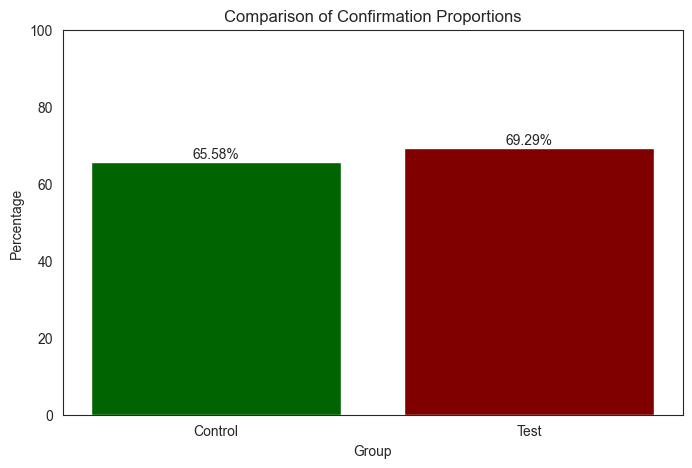

In [2139]:
#plot Comparison of Confirmation Proportions
# Data
categories = ['Control', 'Test']
values = [proportion_confirm_control, proportion_confirm_test]

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['darkgreen', '#800000'])
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.title('Comparison of Confirmation Proportions')
plt.ylim(0, 100)  # Setting the y-axis limit from 0 to 100 for better visualization

# Display the percentage value on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v}%", ha='center', fontweight='normal')


# Show the plot
plt.show()


## Statistical Analysis

### Z-test 

In [2142]:
# Applying a two-proportion z-test.This test compares two population proportions to see if they are significantly different from each other.

# data
p1 = proportion_confirm_control_1  # proportion of control group reaching the last step
p2 = proportion_confirm_test_1
n1 = sum_x   # sample size of control group
n2 = sum_drop_test   # sample size of test group

# Number of successes
x1 = p1 * n1
x2 = p2 * n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# Test statistic
z = (p1 - p2) / se

# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output results
print(f"Test statistic (z): {z}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two proportions.")


Test statistic (z): -5.894563830033553
P-value: 3.756723598868916e-09
Reject the null hypothesis: There is a significant difference between the two proportions.


In [2143]:
print(filter_confirm_control["seconds"].mean())
print(filter_confirm["seconds"].mean())

133.25762780359668
128.823415225963


### T-test

In [2145]:
#test t for comparison beteween CONFIRM in control and CONFIRM in test. 

# Calculate mean values for each group
mean_control = filter_confirm_control["seconds"].mean()
mean_test = filter_confirm["seconds"].mean()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(filter_confirm_control["seconds"], filter_confirm["seconds"], equal_var=False)

# Output the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for statistical significance (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

""" Conclusion:
Since the t-statistic is positive, it suggests that the mean time for the confirm step in the control group is indeed higher than the mean time for the confirm step in the test group.
Thus, the control group takes significantly longer on average to perform the confirm step compared to the test group.
"""


Independent t-test results:
T-statistic: 2.1425929974537907
P-value: 0.032153511138374676
Reject the null hypothesis. There is a significant difference.


' Conclusion:\nSince the t-statistic is positive, it suggests that the mean time for the confirm step in the control group is indeed higher than the mean time for the confirm step in the test group.\nThus, the control group takes significantly longer on average to perform the confirm step compared to the test group.\n'

In [2146]:
#test t for comparison beteween step1 in control and step1 in test. 

# Calculate mean values for each group
mean_control = filter_step_1_control["seconds"].mean()
mean_test = filter_step_1["seconds"].mean()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(filter_step_1_control["seconds"], filter_step_1["seconds"], equal_var=False)

# Output the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for statistical significance (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")



Independent t-test results:
T-statistic: 7.422602155329982
P-value: 1.173298379582298e-13
Reject the null hypothesis. There is a significant difference.


In [2147]:
#test t for comparison beteween step2 in control and step2 in test. 

# Calculate mean values for each group
mean_control = filter_step_2_control["seconds"].mean()
mean_test = filter_step_2["seconds"].mean()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(filter_step_2_control["seconds"], filter_step_2["seconds"], equal_var=False)

# Output the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for statistical significance (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Independent t-test results:
T-statistic: 6.956482886227313
P-value: 3.552532391841653e-12
Reject the null hypothesis. There is a significant difference.


In [2148]:
#test t for comparison beteween step3 in control and step3 in test. 

# Calculate mean values for each group
mean_control = filter_step_3_control["seconds"].mean()
mean_test = filter_step_3["seconds"].mean()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(filter_step_3_control["seconds"], filter_step_3["seconds"], equal_var=False)

# Output the results
print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for statistical significance (using alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Independent t-test results:
T-statistic: 1.8680795901816438
P-value: 0.061759216563849355
Fail to reject the null hypothesis. There is no significant difference.


## Data Visualization & Statistical Analysis - Erros rates


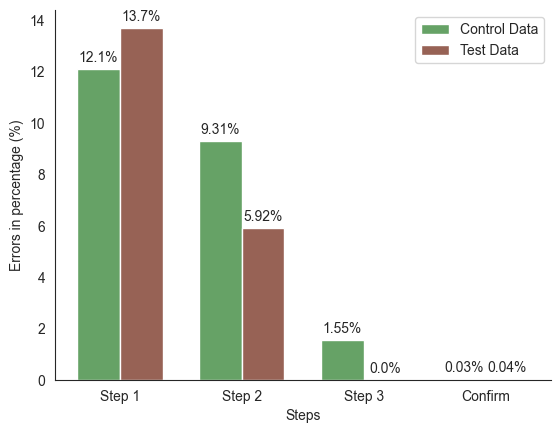

In [2150]:

# Combine test and control data
test_data = [
    error_step_1_test, error_step_2_test, error_step_3_test, error_confirm_test
] 
control_data = [
    error_step_1_control, error_step_2_control, error_step_3_control, error_confirm_control
]

# Number of data points
num_points = len(test_data)

# Width of each bar
bar_width = 0.35

# x-axis locations for the groups
index = np.arange(num_points)

# Custom colors
control_color = '#006400'  # Dark green
test_color = '#976255'     # Maroon

# Plotting the bars
fig, ax = plt.subplots()
bars_control = ax.bar(index, control_data, bar_width, label='Control Data', color=control_color+ '99')
bars_test = ax.bar(index + bar_width, test_data, bar_width, label='Test Data', color=test_color)

# Function to add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add percentage labels on top of each bar
add_labels(bars_control)
add_labels(bars_test)

# Adding labels
plt.xlabel('Steps')
plt.ylabel('Errors in percentage (%)')
#plt.title('Comparison of Test and Control Data')

# Customize ticks and spines
plt.xticks(index + bar_width / 2, ['Step 1', 'Step 2', 'Step 3', 'Confirm'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(os.path.join(save_path, 'error(controlvstest).png'), dpi=300, bbox_inches='tight', transparent=True)

# Adding legend
plt.legend()

In [2151]:
# Applying a two-proportion z-test.This test compares two population proportions to see if they are significantly different from each other.

# Example data (replace with your actual data)
p1 = porpotion_error_step_1_control  # proportion of control group reaching the last step
p2 = porpotion_error_step_1_test
n1 = sum_x   # sample size of control group
n2 = sum_drop_test   # sample size of test group

# Number of successes
x1 = p1 * n1
x2 = p2 * n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# Test statistic
z = (p1 - p2) / se

# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output results
print(f"Test statistic (z): {z}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two proportions.")


Test statistic (z): -4.479473956210134
P-value: 7.482721892770883e-06
Reject the null hypothesis: There is a significant difference between the two proportions.


In [2152]:
# Applying a two-proportion z-test.This test compares two population proportions to see if they are significantly different from each other.

import scipy.stats as stats

# Example data (replace with your actual data)
p1 = porpotion_error_step_2_control  # proportion of control group reaching the last step
p2 = porpotion_error_step_2_test
n1 = sum_x   # sample size of control group
n2 = sum_drop_test   # sample size of test group

# Number of successes
x1 = p1 * n1
x2 = p2 * n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# Test statistic
z = (p1 - p2) / se

# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output results
print(f"Test statistic (z): {z}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two proportions.")


Test statistic (z): 11.866399559250784
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two proportions.


In [2153]:
# Applying a two-proportion z-test.This test compares two population proportions to see if they are significantly different from each other.

import scipy.stats as stats

# Example data (replace with your actual data)
p1 = porpotion_error_step_3_control  # proportion of control group reaching the last step
p2 = porpotion_error_step_3_test
n1 = sum_x   # sample size of control group
n2 = sum_drop_test   # sample size of test group

# Number of successes
x1 = p1 * n1
x2 = p2 * n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# Test statistic
z = (p1 - p2) / se

# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output results
print(f"Test statistic (z): {z}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two proportions.")


Test statistic (z): 17.076175512360955
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two proportions.


In [2154]:
# Applying a two-proportion z-test.This test compares two population proportions to see if they are significantly different from each other.

import scipy.stats as stats

# Example data (replace with your actual data)
p1 = propotion_error_confirm_control  # proportion of control group reaching the last step
p2 = porpotion_error_confirm_test
n1 = sum_x   # sample size of control group
n2 = sum_drop_test   # sample size of test group

# Number of successes
x1 = p1 * n1
x2 = p2 * n2

# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# Test statistic
z = (p1 - p2) / se

# P-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output results
print(f"Test statistic (z): {z}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two proportions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two proportions.")


Test statistic (z): -0.5038657057027275
P-value: 0.6143557512205557
Fail to reject the null hypothesis: There is no significant difference between the two proportions.
